In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
########### no missing values, 11 columns .

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
num_features = [ i for i in data.columns if data[i].dtypes != 'O']

In [11]:
len(num_features)

9

In [12]:
data.shape

(10000, 11)

In [13]:
cat_features = [ i for i in data.columns if data[i].dtypes == 'O']

In [14]:
len(cat_features)

2

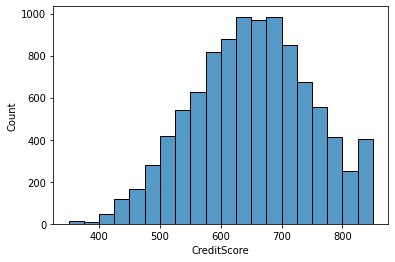

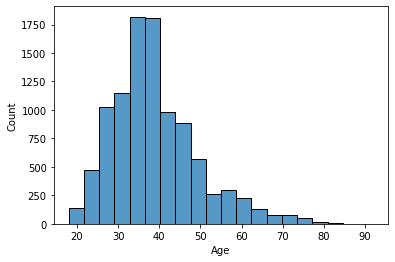

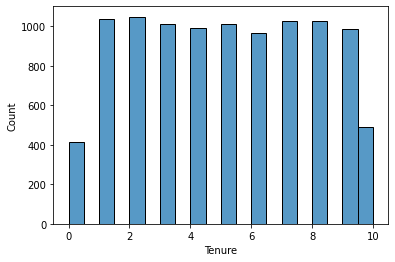

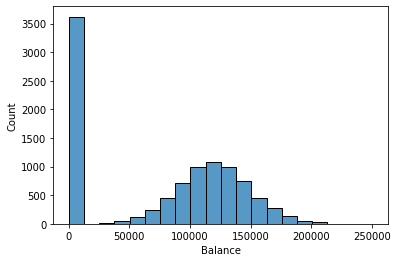

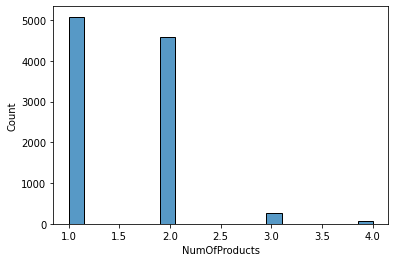

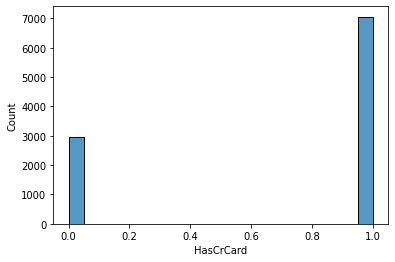

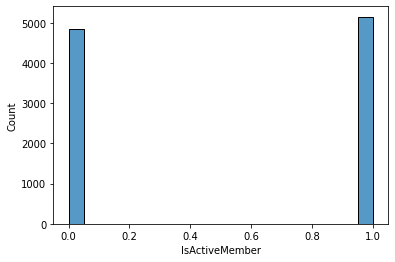

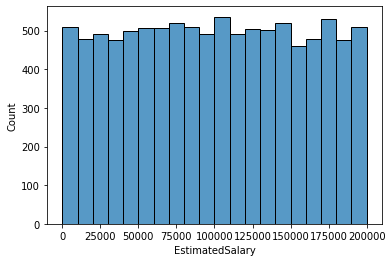

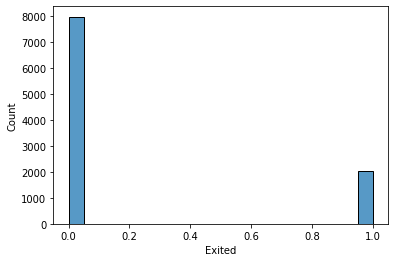

In [15]:
for i in num_features:
    data1 = data.copy()
    sns.histplot(data1[i],bins=20)
    plt.show()
    

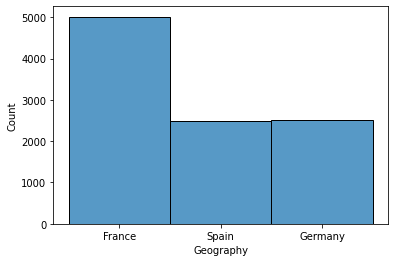

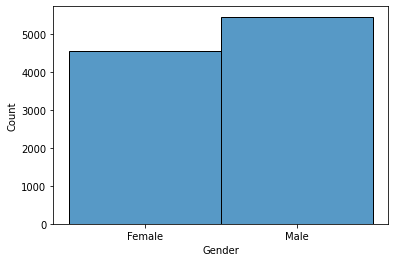

In [16]:
for i in cat_features:
    data1 = data.copy()
    sns.histplot(data1[i],bins=10)
    plt.show()

In [17]:
geography=pd.get_dummies(data["Geography"],drop_first=True)
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [18]:
data = data.drop(['Geography','Gender'],axis=1)

In [19]:
data_final = pd.concat([data,geography,gender],axis=1)

In [20]:
data_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


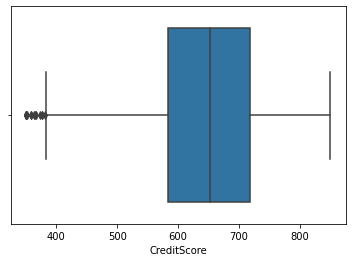

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


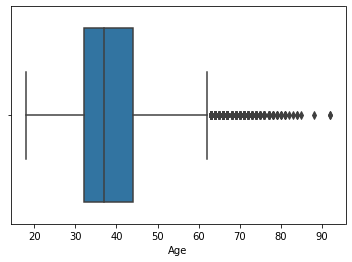

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


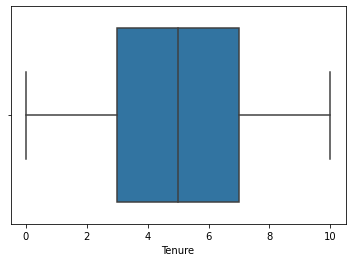

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


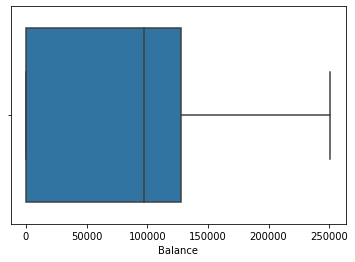

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


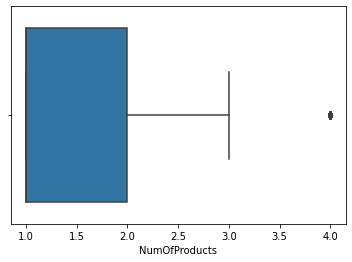

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


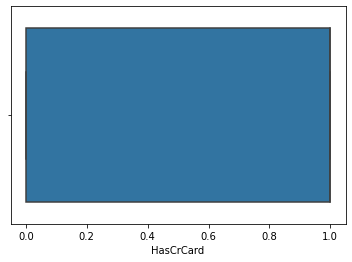

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


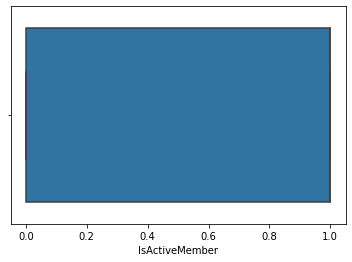

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


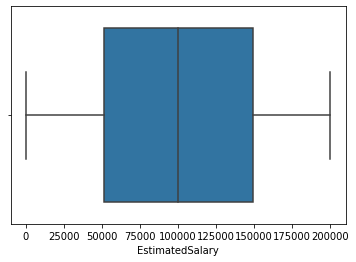

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


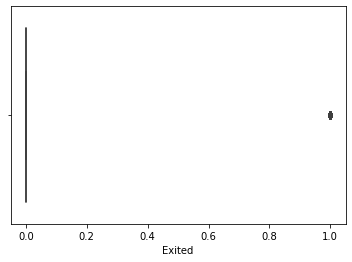

In [21]:
for i in num_features:
    data1 = data.copy()
    sns.boxplot(data1[i])
    plt.show()

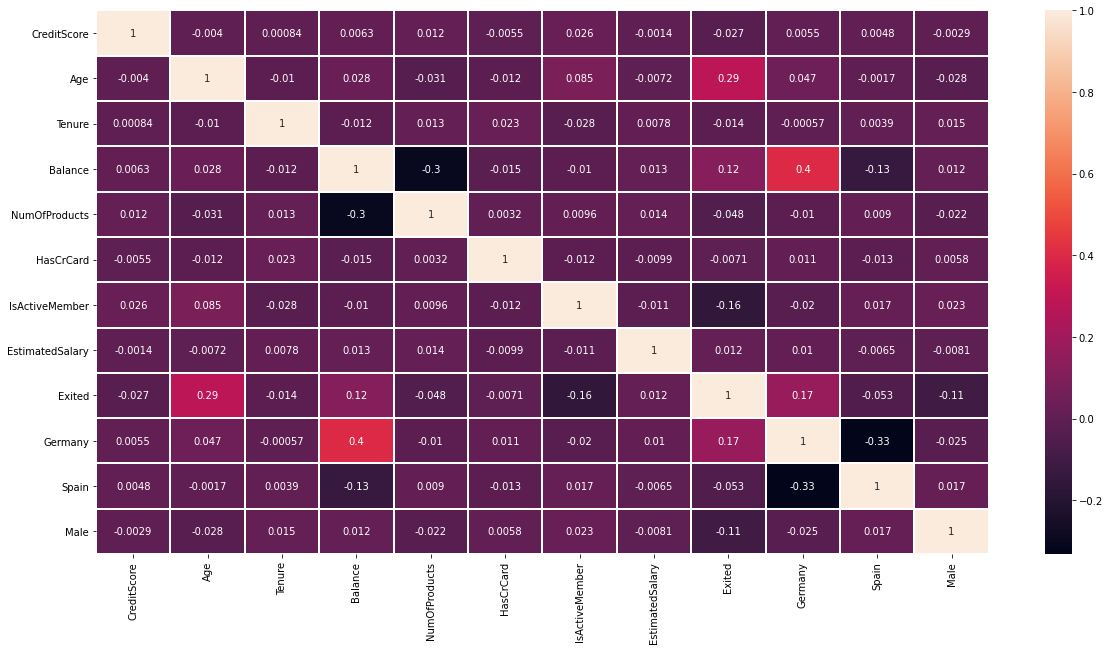

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_final.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [23]:
X = data_final.drop('Exited',axis=1)
y = data_final['Exited']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
X_train.shape

(8000, 11)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_scaled,y_train)
rf_y_pred = clf_rf.predict(X_test_scaled)

print("Accuracy of train data: " , clf_rf.score(X_train_scaled,y_train))
print("Accuracy of test data: " , clf_rf.score(X_test_scaled,y_test))
from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,rf_y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_y_pred))

Accuracy of train data:  0.999875
Accuracy of test data:  0.8685
accuracy is:  0.8685
[[1523   72]
 [ 191  214]]


In [26]:
from sklearn.svm import SVC
clf_sv = SVC(kernel='rbf')
clf_sv.fit(X_train_scaled,y_train)
sv_y_pred = clf_sv.predict(X_test_scaled)


print("Accuracy of train data: " , clf_sv.score(X_train_scaled,y_train))
print("Accuracy of test data: " , clf_sv.score(X_test_scaled,y_test))
from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,sv_y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,sv_y_pred))

Accuracy of train data:  0.866
Accuracy of test data:  0.8635
accuracy is:  0.8635
[[1547   48]
 [ 225  180]]


In [27]:
################### keras -- ANN ###################
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [28]:
# Initialising the ANN
cls = Sequential()

cls.add(Dense(units = 5, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

cls.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 5))

cls.add(Dense(units =1 ,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

cls.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
model_history=cls.fit(X_train, y_train,validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100
268/268 [==============================] - 21s 7ms/step - loss: 2460.6808 - accuracy: 0.6752 - val_loss: 452.6768 - val_accuracy: 0.7387
Epoch 2/100
268/268 [==============================] - 1s 3ms/step - loss: 286.7599 - accuracy: 0.7124 - val_loss: 6.4772 - val_accuracy: 0.7172
Epoch 3/100
268/268 [==============================] - 1s 3ms/step - loss: 17.8165 - accuracy: 0.6268 - val_loss: 12.7393 - val_accuracy: 0.6918
Epoch 4/100
268/268 [==============================] - 1s 3ms/step - loss: 10.9914 - accuracy: 0.6121 - val_loss: 4.9787 - val_accuracy: 0.6736
Epoch 5/100
268/268 [==============================] - 1s 3ms/step - loss: 9.1027 - accuracy: 0.6954 - val_loss: 24.1255 - val_accuracy: 0.5676
Epoch 6/100
268/268 [==============================] - 1s 3ms/step - loss: 9.9264 - accuracy: 0.7154 - val_loss: 16.3350 - val_accuracy: 0.7925
Epoch 7/100
268/268 [==============================] - 1s 3ms/step - loss: 9.2142 - accuracy: 0.7412 - val_loss: 5.2669 - val_acc

Epoch 58/100
268/268 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.7981 - val_loss: 0.5073 - val_accuracy: 0.7955
Epoch 59/100
268/268 [==============================] - 1s 3ms/step - loss: 0.5158 - accuracy: 0.7881 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 60/100
268/268 [==============================] - 1s 3ms/step - loss: 0.5024 - accuracy: 0.7984 - val_loss: 0.5073 - val_accuracy: 0.7955
Epoch 61/100
268/268 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.7953 - val_loss: 0.5069 - val_accuracy: 0.7955
Epoch 62/100
268/268 [==============================] - 1s 3ms/step - loss: 0.5116 - accuracy: 0.7912 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 63/100
268/268 [==============================] - 1s 3ms/step - loss: 0.4891 - accuracy: 0.8080 - val_loss: 0.5069 - val_accuracy: 0.7955
Epoch 64/100
268/268 [==============================] - 1s 3ms/step - loss: 0.4952 - accuracy: 0.8035 - val_loss: 0.5071 - val_accuracy:

In [30]:
y_pred = cls.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[1595    0]
 [ 405    0]]
0.7975


In [44]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import os
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [48]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory=os.path.dirname(r'C:\Users\Chaitanya Mhetre\AppData\Local\Programs\Python\Python39\Scripts\mayuri\DL-churn-modelling-main\DL-churn-modelling-main'),
    project_name='churn_ANN',
    executions_per_trial=3)

In [49]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [50]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.7929999828338623

Best val_accuracy So Far: 0.7931111057599386
Total elapsed time: 00h 04m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(tensorflow.__version__)

In [ ]:
import tensorflow

In [51]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [52]:
best_hps

In [53]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
175/175 [==============================] - 3s 10ms/step - loss: 1.0499 - accuracy: 0.7261 - val_loss: 0.7542 - val_accuracy: 0.5971
Epoch 2/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5967 - accuracy: 0.7702 - val_loss: 0.6546 - val_accuracy: 0.8000
Epoch 3/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5849 - accuracy: 0.7705 - val_loss: 0.5494 - val_accuracy: 0.8000
Epoch 4/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5698 - accuracy: 0.7764 - val_loss: 0.5270 - val_accuracy: 0.8000
Epoch 5/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5461 - accuracy: 0.7925 - val_loss: 0.5569 - val_accuracy: 0.8000
Epoch 6/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5366 - accuracy: 0.7955 - val_loss: 0.5359 - val_accuracy: 0.8000
Epoch 7/50
175/175 [==============================] - 1s 8ms/step - loss: 0.5350 - accuracy: 0.7937 - val_loss: 0.5321 - val_accuracy: 0.8000
Epoch